<a href="https://colab.research.google.com/github/norayehia/chatgpt-reviews-analyses/blob/main/Copy_of_berttry2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install simpletransformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.5/250.5 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.7/468.7 kB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 17.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 59.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.8/198.8 kB 5

In [ ]:
!pip install torchvision

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
from numpy import savetxt, asarray
import pandas as pd
from IPython.display import display
import seaborn as sns
from scipy import stats
import re
import string
import random

# MATPLOTLIB
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

# SKLEARN
import sklearn
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

# NLTK
import nltk
from nltk.tokenize import WordPunctTokenizer, RegexpTokenizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

seed = np.random.RandomState(126)

In [ ]:
import torch
import torchvision

In [ ]:
from simpletransformers.classification import ClassificationModel

In [ ]:
df= pd.read_csv("/content/drive/MyDrive/help/research/aireserchnlp/chatgpt/chdata/file.csv")
df.head

<bound method NDFrame.head of         Unnamed: 0                                             tweets   labels
0                0  ChatGPT: Optimizing Language Models for Dialog...  neutral
1                1  Try talking with ChatGPT, our new AI system wh...     good
2                2  ChatGPT: Optimizing Language Models for Dialog...  neutral
3                3  THRILLED to share that ChatGPT, our new model ...     good
4                4  As of 2 minutes ago, @OpenAI released their ne...      bad
...            ...                                                ...      ...
219289      219289  Other Software Projects Are Now Trying to Repl...      bad
219290      219290  I asked #ChatGPT to write a #NYE Joke for SEOs...     good
219291      219291  chatgpt is being disassembled until it can onl...      bad
219292      219292  2023 predictions by #chatGPT. Nothing really s...      bad
219293      219293   From ChatGPT, neat stuff https://t.co/qjjUF2Z2m0  neutral

[219294 rows x 3 colu

In [ ]:
df.drop_duplicates(subset=['tweets'],keep='first',inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 217622 entries, 0 to 219293
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  217622 non-null  int64 
 1   tweets      217622 non-null  object
 2   labels      217622 non-null  object
dtypes: int64(1), object(2)
memory usage: 6.6+ MB


In [ ]:
df['sentiment']=df['labels']

In [ ]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
df['sentiment']= label_encoder.fit_transform(df['sentiment'])

df['sentiment'].unique()


array([2, 1, 0])

#split train and val

In [ ]:
df_0 = df[df.sentiment == 0].sample(5300)
df_1 = df[df.sentiment == 1].sample(5300)
df_2 = df[df.sentiment == 2].sample(5300)

train_df = pd.concat([df_0, df_1, df_2])

train_df = shuffle(train_df)

In [ ]:
df_0_ = df[df.sentiment == 0].sample(265)
df_1_ = df[df.sentiment == 1].sample(265)
df_2_ = df[df.sentiment == 2].sample(265)

eval_df = pd.concat([df_0_, df_1_, df_2_])

eval_df = shuffle(eval_df)

In [ ]:
Train = pd.DataFrame({
    'text': train_df['tweets'].replace(r'\n', ' ', regex=True),
    'label': train_df['sentiment']
})

Eval = pd.DataFrame({
    'text': eval_df['tweets'].replace(r'\n', ' ', regex=True),
    'label': eval_df['sentiment']
})

The code you provided uses the BERT-base-cased pre-trained model. BERT-base is one of two pre-trained models released by Google and is a smaller version compared to BERT-large. BERT-base has 12 transformer blocks, 110 million parameters, and is trained on a corpus of 3.3 billion words. BERT-large, on the other hand, has 24 transformer blocks and 340 million parameters, and is trained on a corpus of 33 billion words.

The architecture of BERT (Bidirectional Encoder Representations from Transformers) is based on the transformer architecture introduced in the paper "Attention is All You Need" by Vaswani et al. (2017). BERT is a deep bidirectional transformer encoder, which means it uses a multi-layer transformer to encode the input text in both directions (left-to-right and right-to-left). BERT also uses a masked language modeling (MLM) objective during pre-training to predict randomly masked tokens in the input text. The MLM objective helps BERT learn contextual representations of words that capture their meaning based on their surrounding context.

In addition to the MLM objective, BERT also uses a next sentence prediction (NSP) objective during pre-training. The NSP objective involves predicting whether two input sentences follow each other in the original text or not. The NSP objective helps BERT learn the relationships between different sentences and improve its ability to perform tasks such as question answering and text classification.

Overall, the architecture of BERT, with its bidirectional transformer encoder and pre-training objectives, has proven to be a powerful tool for natural language processing tasks and has achieved state-of-the-art results on various benchmarks.

In [ ]:
model = ClassificationModel('bert', 'bert-base-cased', num_labels=3, args={'reprocess_input_data': True, 'overwrite_output_dir': True},use_cuda=False)

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at b

In [ ]:
model.train_model(Train)

/usr/local/lib/python3.9/dist-packages/simpletransformers/classification/classification_model.py:612: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/15900 [00:00<?, ?it/s]

Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 0 of 1:   0%|          | 0/1988 [00:00<?, ?it/s]

(1988, 0.6611282230622811)

https://www.geeksforgeeks.org/ml-label-encoding-of-datasets-in-python/

In [ ]:
# Save the model
model.save_model('/content/drive/MyDrive/help/workong remote/mlarchive/data/new/chmodel')

In [ ]:
result, model_outputs, wrong_predictions = model.eval_model(Eval)

/usr/local/lib/python3.9/dist-packages/simpletransformers/classification/classification_model.py:1454: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/795 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/100 [00:00<?, ?it/s]

In [ ]:
wrong_predictions

[{'guid': 0, 'text_a': 'Just messing around with ChatGPT. I’ve never seen this level of creativity from an AI https://t.co/niZ8bob8UX', 'text_b': None, 'label': 2},
 {'guid': 13, 'text_a': 'Just helped a friend to choose a thesis topic in Data science using chatGPT,where 3 topics were to be submitted along with research paper links and datasets, tomorrow is last date. Hardly took 2 hours.\\nKnow how to ask questions,little bit of prompts and your are on AI bandwagon', 'text_b': None, 'label': 2},
 {'guid': 14, 'text_a': "Wow, ChatGPT for Chrome Extension hit 10,000 installs in 5 days 🤯🤯🤯\\nSee how much Ben's Bites &amp; ProductHunt drove the traffic!\\n\\nIt took us a year to hit 20,000 Chrome Extension installs at @_Glasp, so you see how crazy it is!\\n\\n❤️Acknowledge: @bentossell @ProductHunt &amp; @OpenAI https://t.co/1B8WGfUn3S https://t.co/K8oneYREmW", 'text_b': None, 'label': 2},
 {'guid': 15, 'text_a': 'Ask anything on twitter and ChatGpt app is there to provide the most human 

In [ ]:
result

{'mcc': 0.7346111215807123, 'eval_loss': 0.4742274614050984}

In [ ]:
model_outputs

array([[-2.28894019,  1.23569632,  0.39448214],
       [-2.81547785,  2.71649957, -0.73001188],
       [ 0.88650197, -1.01372635,  1.27829599],
       ...,
       [-1.03157878, -0.28879857,  1.50450301],
       [-2.91239119,  2.69139862, -0.66861367],
       [-2.69361734,  2.44549179, -0.51948613]])

#evaluation

In [ ]:

lst = []
for arr in model_outputs:
    lst.append(np.argmax(arr))

In [ ]:
true = Eval['label'].tolist()
predicted = lst

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(true,predicted)

0.8226415094339623

In [ ]:
print(sklearn.metrics.classification_report(true,predicted,target_names=['positive','neutral','negative']))

              precision    recall  f1-score   support

    positive       0.88      0.85      0.86       265
     neutral       0.83      0.89      0.86       265
    negative       0.76      0.72      0.74       265

    accuracy                           0.82       795
   macro avg       0.82      0.82      0.82       795
weighted avg       0.82      0.82      0.82       795



In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
 confusion_matrix(true,predicted)

array([[225,   5,  35],
       [  4, 237,  24],
       [ 28,  45, 192]])

In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

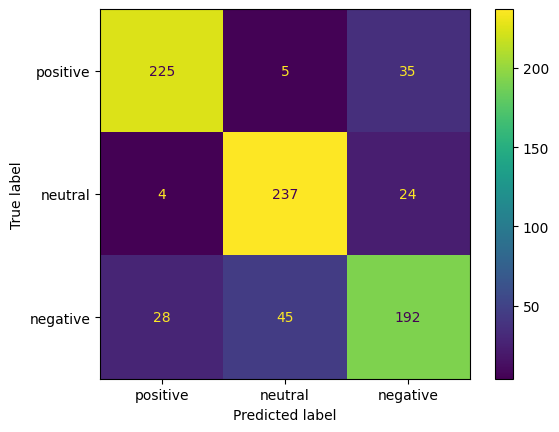

In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

#actual = numpy.random.binomial(1,.9,size = 1000)
#predicted = numpy.random.binomial(1,.9,size = 1000)

confusion_matrix = metrics.confusion_matrix(true,predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels =['positive','neutral','negative'])

cm_display.plot()
plt.show()